In [1]:
import numpy as np
import pandas as pd

In [2]:
#the file was saved with a different encoding, and pandas is unable to correctly interpret the byte sequence,by default utf-8 encoding is used.
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')  # or use 'latin1'

In [3]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4109,ham,"Yo, you gonna still be in stock tomorrow/today...",NaN,NaN,NaN
3293,ham,Beautiful tomorrow never comes.. When it comes...,NaN,NaN,NaN
3220,spam,"Thanks for your ringtone order, reference numb...",NaN,NaN,NaN
2260,spam,SplashMobile: Choose from 1000s of gr8 tones e...,NaN,NaN,NaN
5078,ham,Mark works tomorrow. He gets out at 5. His wor...,NaN,NaN,NaN
4376,ham,How much is torch in 9ja.,NaN,NaN,NaN
4758,spam,Thanks 4 your continued support Your question ...,NaN,NaN,NaN
1236,ham,How much are we getting?,NaN,NaN,NaN
3301,ham,Stop calling everyone saying I might have canc...,NaN,NaN,NaN
1754,ham,How is your schedule next week? I am out of to...,NaN,NaN,NaN


In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
#DATA CLEANING
#EDA
#TEXT PREPROCESSING
#MODEL BUILDING
#EVALUATION
#IMPROVEMENT
#WEBSITE
#DEPLOY

### DATA CLEANING

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last three column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) #true-for permanent changes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [10]:
df.sample(5)

,v1,v2
4869,ham,Dip's cell dead. So i m coming with him. U bet...
4002,ham,somewhere out there beneath the pale moon ligh...
1850,ham,Then cant get da laptop? My matric card wif Ì_...
4189,ham,"Sorry, I'll call later"
2059,ham,He didn't see his shadow. We get an early spri...


In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#renaming the column
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [13]:
df.sample(5)

,Target,Text
5116,ham,Thanks. Fills me with complete calm and reassu...
2507,ham,Yup...
4272,ham,Kind of. Just missed train cos of asthma attac...
918,ham,Hey you gave them your photo when you register...
1212,ham,"Yo, the game almost over? Want to go to walmar..."


In [14]:
#The LabelEncoder from sklearn.preprocessing is used to convert categorical labels (like strings) into numeric values.(SPECIALLY FOR ML ALGO)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
encoder.fit_transform(df['Target'])

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
df['Target']=encoder.fit_transform(df['Target'])

In [17]:
df.sample(5)

,Target,Text
3365,0,I am waiting for your call sir.
4271,0,Where to get those?
4962,0,I want to see your pretty pussy...
5011,0,U attend ur driving lesson how many times a wk...
2104,0,Anyway seriously hit me up when you're back be...


In [18]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# missing value
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [20]:
#check for duplicate value
df.duplicated().sum()

403

In [21]:
# remove duplicate
df=df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(5169, 2)

### EDA
Exploratory data analysis

In [24]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

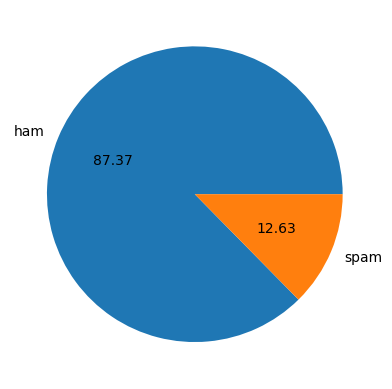

In [26]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [27]:
#data is imbalanced

In [28]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [29]:
df['Character_Count']=df['Text'].apply(len)

In [30]:
df.head(10)

,Target,Text,Character_Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
5,1,FreeMsg Hey there darling it's been 3 week's n...,148
6,0,Even my brother is not like to speak with me. ...,77
7,0,As per your request 'Melle Melle (Oru Minnamin...,160
8,1,WINNER!! As a valued network customer you have...,158
9,1,Had your mobile 11 months or more? U R entitle...,154


In [31]:
df['Word_Count']=df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [32]:
df.head()

,Target,Text,Character_Count,Word_Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['Sentence_Count']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,Target,Text,Character_Count,Word_Count,Sentence_Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['Character_Count','Word_Count','Sentence_Count']].describe()

,Character_Count,Word_Count,Sentence_Count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
df[df['Target']==0]

,Target,Text,Character_Count,Word_Count,Sentence_Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [37]:
#ham
df[df['Target']==0][['Character_Count','Word_Count','Sentence_Count']].describe()

,Character_Count,Word_Count,Sentence_Count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
#spam
df[df['Target']==1][['Character_Count','Word_Count','Sentence_Count']].describe()

,Character_Count,Word_Count,Sentence_Count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='Character_Count', ylabel='Count'>

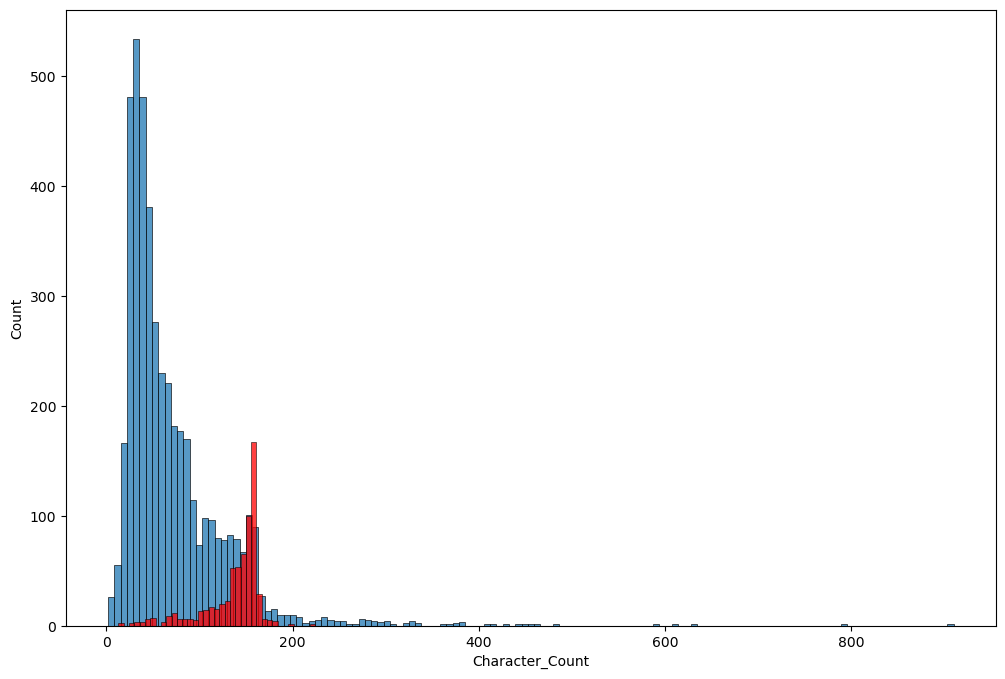

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['Character_Count'])
sns.histplot(df[df['Target']==1]['Character_Count'],color='red')

<Axes: xlabel='Word_Count', ylabel='Count'>

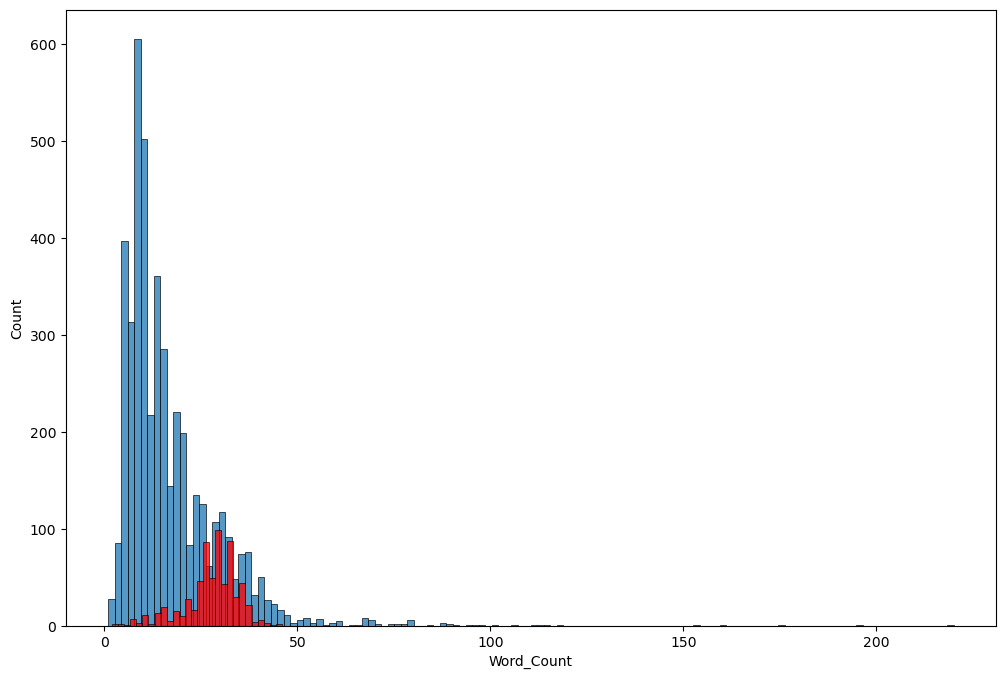

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['Word_Count'])
sns.histplot(df[df['Target']==1]['Word_Count'],color='red')

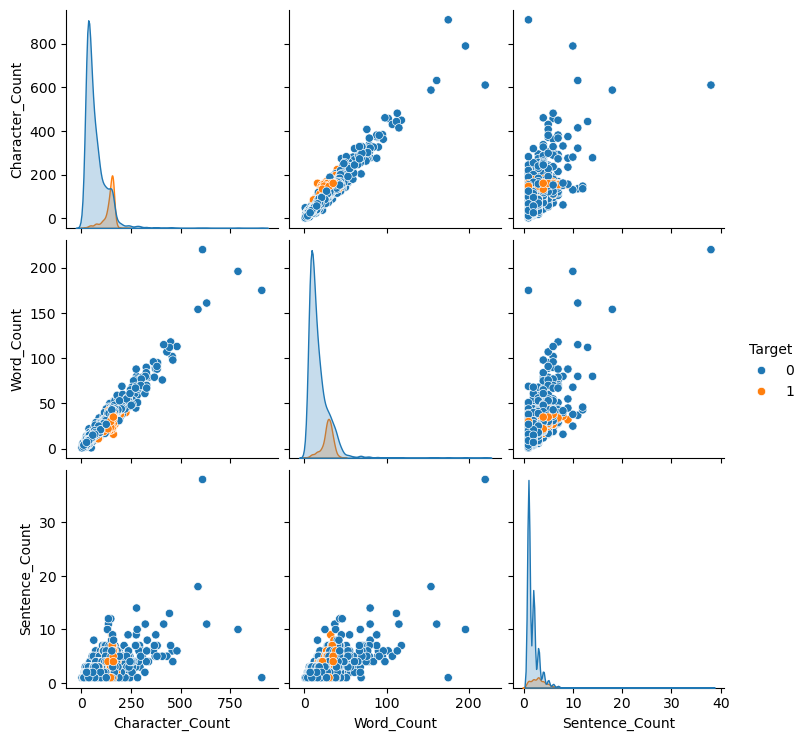

In [42]:
sns.pairplot(df,hue='Target')

<Axes: >

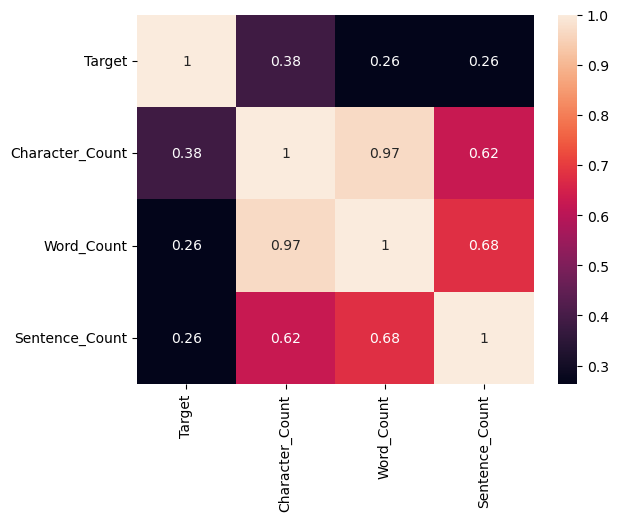

In [43]:
# correlation cofficient
df_numeric = df.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=True)

### Data/Text Preprocessing
<li> Lower case </li>
<li> Tokenization </li>
<li>Removing Special Characters</li>
<li>Removing  stop words and punctuation---no meaning in the contibution of sentence</li>
<li>Stemming--smilar meaning word</li>

In [44]:
## remove stop words
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
def transform_text(text):
    text = text.lower()  # Convert text to lowercase
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)  # Return the transformed text


In [64]:
transform_text("Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx")

'okay name ur price long legal wen pick u ave x am xx'

In [63]:
df['Text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [58]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("dancing")

'danc'

In [66]:
df['transformed_text']=df['Text'].apply(transform_text)

In [67]:
df.head()

,Target,Text,Character_Count,Word_Count,Sentence_Count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [69]:
!pip install wordcloud

In [75]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [76]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

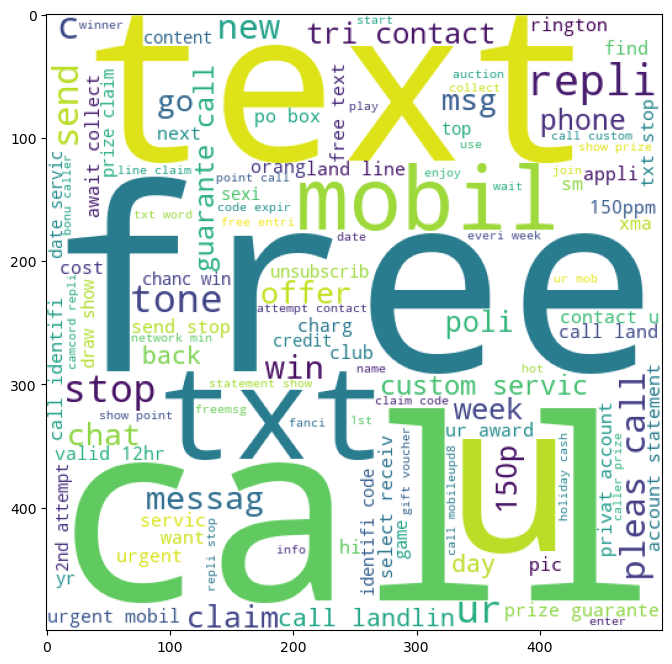

In [80]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [81]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

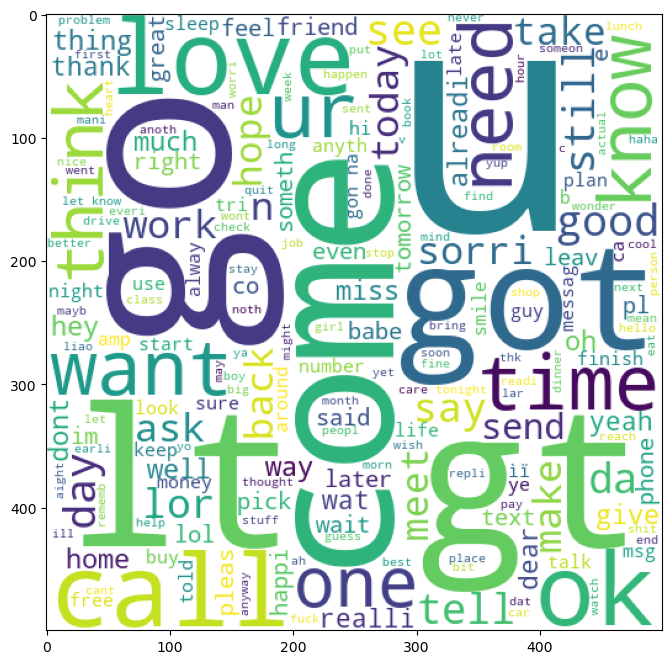

In [82]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [83]:
df.head()

,Target,Text,Character_Count,Word_Count,Sentence_Count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [87]:
spam_corpus=[]
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [88]:
len(spam_corpus)

9939

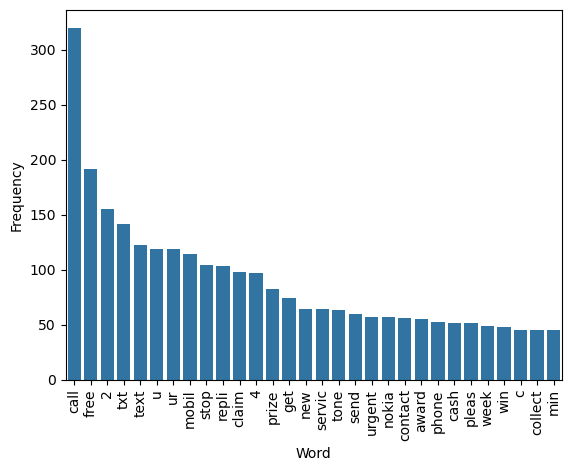

In [101]:
from collections import Counter
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=word_freq)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [102]:
ham_corpus=[]
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [104]:
len(ham_corpus)

35404

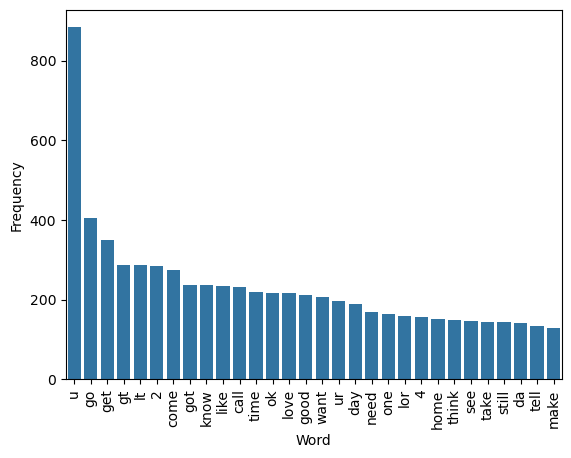

In [105]:
from collections import Counter
word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=word_freq)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### Model Building

In [235]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Initialize the vectorizers
cv = CountVectorizer()  # CountVectorizer for bag-of-words
tfidf = TfidfVectorizer(max_features=3000)  # TfidfVectorizer for TF-IDF

In [236]:
#X=cv.fit_transform(df['transformed_text']).toarray()
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [237]:
# X=np.hstack((X,df['Character_Count'].values.reshape(-1,1)))

In [238]:
X.shape

(5169, 3000)

In [239]:
y=df['Target'].values

In [240]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [243]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming X_train, X_test, y_train, y_test are already defined
gnb = GaussianNB()  # Initialize the Gaussian Naive Bayes model
gnb.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred1 = gnb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))

Accuracy: 0.8694390715667312
Confusion Matrix:
 [[788 108]
 [ 27 111]]
Precision: 0.5068493150684932


In [244]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming X_train, X_test, y_train, y_test are already defined
mnb = MultinomialNB()  # Initialize the Multinomial Naive Bayes model
mnb.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred2 = mnb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

Accuracy: 0.9709864603481625
Confusion Matrix:
 [[896   0]
 [ 30 108]]
Precision: 1.0


In [245]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Assuming X_train, X_test, y_train, y_test are already defined
bnb = BernoulliNB()  # Initialize the Multinomial Naive Bayes model
bnb.fit(X_train, y_train)  # Train the model

# Make predictions
y_pred3 = bnb.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

Accuracy: 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision: 0.991869918699187


In [246]:
# tfid --> mnb

In [247]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))